In [1]:
import numpy as np
import cv2

import numpy as np
import matplotlib.pyplot as plt

In [2]:
## plot for(a)
def subplot(points , result1 , result2 , img):
    plt.imshow(img)
    plt.scatter(points[:, 0], points[:, 1],  s=0.5)
    plt.plot(result1[:, 0], result1[:, 1], 'b-' ,linewidth=0.5)

    plt.plot(result2[:, 0], result2[:, 1], 'r-' ,linewidth=0.5)
    plt.savefig('output/1a.png')
    plt.imshow(img)
    plt.show()
    plt.close()

## plot for(b)
def plot(points , result , img):
    plt.imshow(img)
    plt.scatter(points[:, 0], points[:, 1],  s=5)
    plt.plot(result[:, 0], result[:, 1], 'r-' ,linewidth=0.5)
    plt.savefig('output/1b.png')
    plt.imshow(img)
    plt.show()
    plt.close()


In [3]:
## TODO calculate bezier curve
def bezier_curve(points , time_steps , scale_up_ratio = 1):
    # basic matrix
    M = [[-1, 3, -3, 1], [3, -6, 3, 0], [-3, 3, 0, 0], [1, 0, 0 ,0]] 
    M = np.array(M)

    num_curves = int(len(points) / 3)
    results = []
    for i in range(num_curves):
        # geometry matrix
        G = points[i*3:i*3+4] * scale_up_ratio
        for t in time_steps:
            # parametric matrix
            T = np.array([pow(t, 3), pow(t, 2), t, 1])
            P = np.dot(np.dot(T, M), G)
            results.append(P)
    results = np.array(results)

    return results

In [4]:
## TODO Scale up image
def nearest_inter(img):        
    height, width = img.shape[0] * 4, img.shape[1] * 4
    scale_up_img = np.zeros((height, width, 3), dtype=img.dtype)
    for i in range(height):
        for j in range(width):
            x, y = round(i / 4), round(j / 4)
            if(x == img.shape[0]): x = img.shape[0] - 1
            if(y == img.shape[1]): y = img.shape[1] - 1
            scale_up_img[i, j] = img[x, y]
            
    return scale_up_img

## 1.a

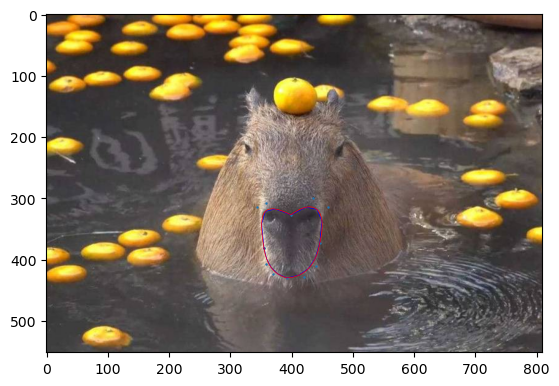

In [5]:
  # Load the image and points
img = cv2.imread("bg.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
points = np.loadtxt("points.txt")


## 1.a
## TODO: You shold replace result1 , result2 with low-detail and high-detail curve results return by function bezier_curve()
low_detail_t = np.arange(0, 1.25, 0.25)
high_detail_t = np.arange(0, 1.0001, 0.0001)
result1 = bezier_curve(points, low_detail_t)
result2 = bezier_curve(points, high_detail_t)
subplot(points  , result1 , result2 , img)


## 1.b

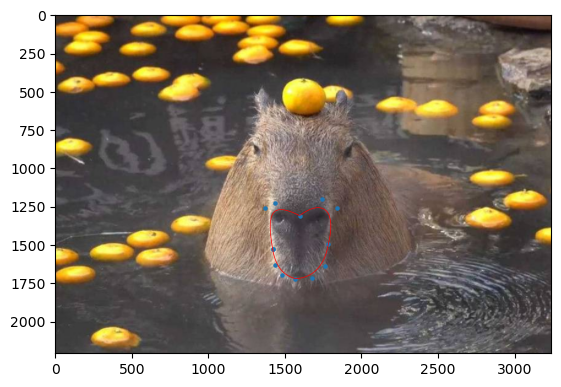

In [6]:
## TODO: You shold replace img with scale up img return by function nearest_inter() and result with scale up curve
scale_up_img  = nearest_inter(img)
result = bezier_curve(points, high_detail_t, scale_up_ratio=4)
plot(points * 4, result, scale_up_img)

### Report

- Bezier curve主要按照講義上的方式進行實作，而在我的實作中，我選擇使用matrix運算的版本，個別得出basic、geometry及parametric matrix後，將三者做相乘就可以得到該time step t的值
- high和low detail從time step間隔就可以看出差異，因為low所含的step很少，所以在繪圖時可以很明顯看出藍線的稜角，而high則因為step較多，繪製出來的曲線則較平滑